In [1]:
from astropy.io import ascii
from regions import CircleSkyRegion
from astropy.table import QTable, Table, Column
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude
from astropy import units as u
from astropy.table import Table, Column, join, vstack
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import regions
import re
from astropy.io import fits
from astropy.wcs import WCS
from radio_beam import Beam
from collections import Counter
import astropy.constants as c
#from gaussfit_catalog import gaussfit_catalog
from astrodendro import Dendrogram, pp_catalog
from astropy.io import fits
from astropy import units as u
import matplotlib.pyplot as plt
#import regions
import numpy as np
from astropy import coordinates
from astropy import wcs
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.table import QTable, Table, Column
import matplotlib.cm as cm
from pyregion.mpl_helper import properties_func_default
from astropy.visualization import simple_norm
from astropy.stats import mad_std
#from regions import DS9Parser #depreciated
import re
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion
import warnings
from astropy import visualization
from astropy.io import ascii
# from astropy.table import Table
import pandas as pd
from astropy.table import vstack

import numpy as np
import astropy.constants as c
import astropy.units as u

from radio_beam import Beam


from astropy.stats import sigma_clip
from regions import Regions
from regions import PixCoord, CirclePixelRegion, CircleAnnulusPixelRegion
import matplotlib as mpl
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'lines.linewidth': 2})

In [2]:
# to do:
# add location of sources that do not appear in the new catalog by hand.

In [3]:
def read_in(path):
    """
    Simplify reading in the files.
    """
    fh=fits.open(path)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        wcs = WCS(fh[0].header)
        hdr = fh[0].header
    datas=fh[0].data #
    return datas, wcs, hdr

In [4]:
base = '/orange/adamginsburg/sgrb2/NB/the_end/'
pathNB3 = base+'sgr_b2.N.B3.cont.r0.5.1m0.075mJy.cal2.image.tt0.pbcor.fits'
pathMB3 = base+'sgr_b2.M.B3.cont.r0.5.1m0.125mJy.cal3.image.tt0.pbcor.fits'
pathNB6 = base+'sgr_b2.N.B6.cont.r0.5.1m1.5mJy.cal4.image.tt0.pbcor.fits'
pathMB6 = base+'sgr_b2.M.B6.cont.r0.5.1m0.68mJy.cal3.image.tt0.pbcor.fits'

In [5]:
# read in the data, wcs, and the header
dataNB3, wcsNB3, hdrNB3 = read_in(pathNB3)
dataMB3, wcsMB3, hdrMB3 = read_in(pathMB3)
dataNB6, wcsNB6, hdrNB6 = read_in(pathNB6)
dataMB6, wcsMB6, hdrMB6 = read_in(pathMB6)
# get the beam from the header
my_beamNB3 = Beam.from_fits_header(hdrNB3)
my_beamMB3 = Beam.from_fits_header(hdrMB3)
my_beamNB6 = Beam.from_fits_header(hdrNB6)
my_beamMB6 = Beam.from_fits_header(hdrMB6)
# get the pixel scale from the header

#scale = wcsNB3.proj_plane_pixel_scales()[0] #This is better
# scaleNB3 = hdrNB3['CDELT2'] * u.deg
# scaleMB3 = hdrMB3['CDELT2'] * u.deg
# scaleNB6 = hdrNB6['CDELT2'] * u.deg
# scaleMB6 = hdrMB6['CDELT2'] * u.deg
scaleNB3 = wcsNB3.proj_plane_pixel_scales()[0]
scaleMB3 = wcsMB3.proj_plane_pixel_scales()[0]
scaleNB6 = wcsNB6.proj_plane_pixel_scales()[0]
scaleMB6 = wcsMB6.proj_plane_pixel_scales()[0]

In [6]:
base = '/orange/adamginsburg/sgrb2/NB/catalog/'
lowres = Table.read(base+'lowres_cat.txt', format='ipac')
base = '/orange/adamginsburg/sgrb2/NB/catalog_the_end/'
catNB3 = Table.read(base+'catalog_NB3_4RMS_30.0rings_0.7mindelta3npix_final_Nazar_review.csv', format='ascii')
catMB3 = Table.read(base+'catalog_MB3_4RMS_30.0rings_0.7mindelta3npix_final_Nazar_review.csv', format='ascii')
catNB6 = Table.read(base+'catalog_NB6_4RMS_30.0rings_0.7mindelta3npix_final_Nazar_review.csv', format='ascii')
catMB6 = Table.read(base+'catalog_MB6_4RMS_30.0rings_0.7mindelta3npix_final_Nazar_review.csv', format='ascii')
from purify_catalog import HII_catalogs, cat_purification_cores
catNB3_m, catMB3_m, catNB6_m,catMB6_m = cat_purification_cores(catNB3, catMB3, catNB6, catMB6)
catNB3_HII, catNB3_HII_cand, catNB3_HII_new, catMB3_HII, catMB3_HII_cand, catMB3_HII_new, catNB6_HII, catNB6_HII_cand, catNB6_HII_new, catMB6_HII, catMB6_HII_cand, catMB6_HII_newI = HII_catalogs(catNB3, catNB6, catMB3, catMB6)

Removed 198 sources for the complete catalog
Removed 9 sources for the medium catalog
Removed 81 sources for the robust catalog
Removed 186 sources for the complete catalog
Removed 7 sources for the medium catalog
Removed 47 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 6 sources for the medium catalog
Removed 58 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 8 sources for the medium catalog
Removed 32 sources for the robust catalog


/orange/adamginsburg/sgrb2/NB/python_env_test/lib/python3.9/site-packages/astropy/table/table.py:1412: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]
/home/nbudaiev/.local/lib/python3.9/site-packages/numpy/ma/core.py:3224: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/nbudaiev/.local/lib/python3.9/site-packages/numpy/ma/core.py:3256: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be 

In [7]:
base = '/orange/adamginsburg/sgrb2/NB/catalog_the_end/'
path = base+'SgrB2_selfcal_full_TCTE7m_selfcal6_ampphase_taylorterms_multiscale_deeper_mask1.5mJy.image.tt0.pbcor.fits'
hdu = fits.open(path)[0]
my_beam = Beam.from_fits_header(hdu.header)
wcs_ = WCS(hdu.header)
data = hdu.data

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [8]:
base = '/orange/adamginsburg/sgrb2/NB/catalog/'
lowres = Table.read(base+'lowres_cat.txt', format='ipac')
lowres = lowres[lowres['sum']!=0]
lowres_noHII = lowres[np.where(lowres['SIMBAD_OTYPE']!='HII')]
lowres_noHII = lowres_noHII[np.where(lowres_noHII['SIMBAD_OTYPE']!='maser')]
lowres = lowres_noHII

In [9]:
# inspect sources that are visible in G18, but are not present in high-resolution data by hand

In [10]:
resolved_out = np.array(['core_136'
,'core_138'
#,'core_224' rejected
,'core_156'
,'core_250' # low
,'core_230' 
,'core_214' # low
,'core_220' # low
,'core_219' # low
,'core_218' # low
,'core_227'
#,'core_228' probably wasn't a source to begin with
,'core_167' # low
,'core_269' # low
#,'core_147' # visible, too faint
#,'core_266' # visible, too faint
#,'core_267' # visible, too faint
#,'core_73' # edge, visible
,'core_187' # low
,'core_186' # low
#,'core_122' edge, visible
#,'core_77' rejected
#,'core_127' edge, visible
#,'core_126' edge, visible
#,'core_125' visible, too faint
,'core_248' # low
#,'core_80' rejected
,'core_144'
,'core_79'
#,'core_188' edge, visible
])

In [11]:
resolved_out = np.array([
    'core_136',
    'core_148',
    'core_156',
    'core_230',
    'core_227',
    'core_144',
    'core_79'
])
resolved_out_low_conf = np.array([
    'core_250',
    'core_214',
    'core_220',
    'core_219',
    'core_218',
    'core_167',
    'core_269',
    'core_187',
    'core_186',
    'core_248',
])

In [12]:
(lowres[lowres['name'] == 'core_131']['peak']).to(u.K, u.brightness_temperature(96.35*u.GHz, my_beam))

<Quantity [1.67568188] K>

In [13]:
(catMB3[catMB3['_name'] == 67]['peak']).to(u.K, u.brightness_temperature(92.45*u.GHz, my_beamMB3))

<Quantity [13.17163423] K>

In [14]:
bool_array = []
for i in range(len(lowres)):
    if lowres['name'][i] in resolved_out:
        bool_array += [True]
    else:
        bool_array += [False]
        
lowres_resolved_out = lowres[bool_array]

bool_array = []
for i in range(len(lowres)):
    if lowres['name'][i] in resolved_out_low_conf:
        bool_array += [True]
    else:
        bool_array += [False]
        
lowres_resolved_out_low_conf = lowres[bool_array]

In [15]:
catB3_m = vstack([catNB3_m,catMB3_m])
#catB6 = vstack([catNB6,catMB6])

In [16]:
ra1 = catB3_m['x_cen']
dec1 = catB3_m['y_cen']
ra2 = lowres['RA']
dec2 = lowres['Dec']
c1 = SkyCoord(ra1, dec1, frame='icrs', unit='deg')
c2 = SkyCoord(ra2, dec2, frame='icrs', unit='deg')
radius = ((my_beam.major+my_beam.minor)/2)*1.5

In [17]:
# Looking for c1 (highres) around c2 coords (lowres)
idxc, idxcatalog, d2d, d3d = c1.search_around_sky(c2, radius)

In [18]:
all_idx = np.linspace(0,370,371)
new_detections_bool = []
for i in range(len(all_idx)):
    if all_idx[i] in idxcatalog:
        new_detections_bool += [False]
    else:
        new_detections_bool += [True]

In [19]:
catB3_m_new_detections = catB3_m[new_detections_bool]
ras_new = catB3_m_new_detections['x_peak']
decs_new = catB3_m_new_detections['y_peak']

new_coords = SkyCoord(ras_new, decs_new, unit = u.deg)#, frame = 'ircs')
x_new_coords, y_new_coords = new_coords.to_pixel(wcs_)

In [20]:
high_per_low = np.array(Counter(idxc).most_common())[:,1]

In [21]:
# counter [0] = id, [1] = number of occurances

In [22]:
ids_lowres = np.array(Counter(idxc).most_common())[:,0]

In [23]:
occurances_lowres = np.array(Counter(idxc).most_common())[:,1]

In [24]:
bins=np.linspace(0.5,10.5,11)

In [25]:
weights = [0.001]*len(occurances_lowres)

In [26]:
x = lowres[ids_lowres]['peak']
y = occurances_lowres
a, b = np.polyfit(x, y, 1)

In [27]:
occurances_lowres_over1 = occurances_lowres[occurances_lowres>1]
ids_lowres_over1 = ids_lowres[occurances_lowres>1]

occurances_lowres_1 = occurances_lowres[occurances_lowres==1]
ids_lowres_1 = ids_lowres[occurances_lowres==1]

In [28]:
ras = lowres['RA'][ids_lowres_over1]
decs = lowres['Dec'][ids_lowres_over1]
sizes = occurances_lowres_over1

ras1 = lowres['RA'][ids_lowres_1]
decs1 = lowres['Dec'][ids_lowres_1]

In [29]:
number_of_lowres_resolved_out_low_conf = [0] * len(lowres_resolved_out_low_conf)
number_of_lowres_resolved_out = [0] * len(lowres_resolved_out)

In [30]:
arr_resolved_out = []
for i in range(len(resolved_out)):
    arr_resolved_out += [lowres[lowres['name'] == resolved_out[i]]['peak'].value]
    
    arr_resolved_out_low_conf = []
for i in range(len(resolved_out_low_conf)):
    arr_resolved_out_low_conf += [lowres[lowres['name'] == resolved_out_low_conf[i]]['peak'].value]
arr_resolved_out_low_conf = arr_resolved_out_low_conf[1:] # Something went bad somewhere... but I am not fixing it now

Text(0, 0.5, 'Ginsburg 18 flux (Jy)')

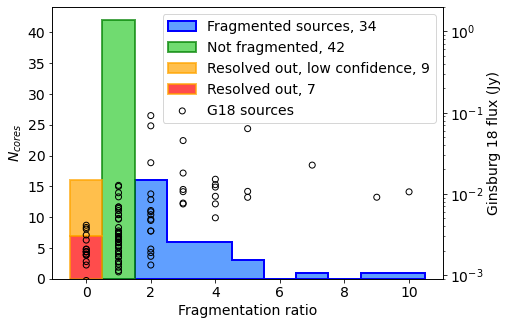

In [31]:
fontsize = 14
fig, ax = plt.subplots(figsize=(7,5))

bins=np.linspace(-0.5,10.5, 12)
plt.hist(occurances_lowres_over1, alpha = 1, linewidth = 2, histtype = 'stepfilled', ec = 'blue', bins=bins, 
         label = 'Fragmented sources, '+str(len(occurances_lowres_over1)), color = '#609fff')
plt.hist(occurances_lowres_1, alpha = 0.7, linewidth = 2, histtype = 'stepfilled', bins=np.linspace(0.5,1.5, 2), 
         label = 'Not fragmented, '+str(len(occurances_lowres_1)), color = '#33cc33', ec = 'green')
plt.hist([number_of_lowres_resolved_out, number_of_lowres_resolved_out_low_conf], alpha = 0.7, linewidth = 2, 
         histtype = 'stepfilled', color = ['red', 'orange'], 
         ec = 'orange', bins=np.linspace(-0.5,0.5, 2), stacked = True, hatch=['/','|'],  
         label = ['Resolved out, '+str(len(number_of_lowres_resolved_out)), 'Resolved out, low confidence, '+str(len(number_of_lowres_resolved_out_low_conf))])

plt.xlabel('Fragmentation ratio', fontsize = fontsize)
plt.ylabel(r'$N_{cores}$')

plt.scatter(np.nan,np.nan, marker = 'o', color = 'k', facecolors='none', edgecolors='k', label = 'G18 sources') 
plt.legend(fontsize = fontsize,)   

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.scatter(occurances_lowres, lowres[ids_lowres]['peak'], marker = 'o', color = 'k', facecolors='none', edgecolors='k', label = 'G18 sources')
ax2.scatter(number_of_lowres_resolved_out, arr_resolved_out, marker = 'o', color = 'k', facecolors='none', edgecolors='k')
ax2.scatter(number_of_lowres_resolved_out_low_conf, arr_resolved_out_low_conf, marker = 'o', color = 'k', facecolors='none', edgecolors='k')
plt.yscale('log')
plt.ylim(0.0009,2)
ax2.set_ylabel("Ginsburg 18 flux (Jy)",fontsize=14)
#plt.savefig('flux_fragmentation.png',dpi=300,bbox_inches='tight')

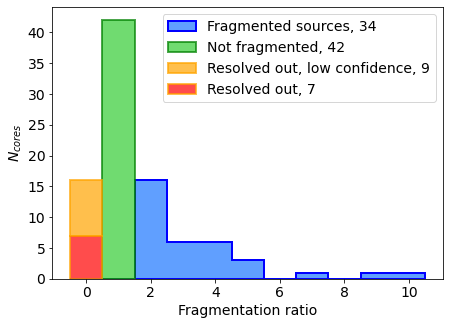

In [32]:
fontsize = 14
fig = plt.figure(figsize=(7,5))
bins=np.linspace(-0.5,10.5, 12)
plt.hist(occurances_lowres_over1, alpha = 1, linewidth = 2, histtype = 'stepfilled', ec = 'blue', bins=bins, 
         label = 'Fragmented sources, '+str(len(occurances_lowres_over1)), color = '#609fff')
plt.hist(occurances_lowres_1, alpha = 0.7, linewidth = 2, histtype = 'stepfilled', bins=np.linspace(0.5,1.5, 2), 
         label = 'Not fragmented, '+str(len(occurances_lowres_1)), color = '#33cc33', ec = 'green')
plt.hist([number_of_lowres_resolved_out, number_of_lowres_resolved_out_low_conf], alpha = 0.7, linewidth = 2, 
         histtype = 'stepfilled', color = ['red', 'orange'], 
         ec = 'orange', bins=np.linspace(-0.5,0.5, 2), stacked = True, hatch=['/','|'],  
         label = ['Resolved out, '+str(len(number_of_lowres_resolved_out)), 'Resolved out, low confidence, '+str(len(number_of_lowres_resolved_out_low_conf))])
#plt.hist(number_of_lowres_resolved_out, alpha = 0.5, linewidth = 2, histtype = 'stepfilled', bins=bins, color = 'red', stacked = True)
plt.xlabel('Fragmentation ratio', fontsize = fontsize)
plt.ylabel(r'$N_{cores}$')
plt.legend(fontsize = fontsize)
#plt.savefig('Sources_per_source.png',dpi=300,bbox_inches='tight')

In [33]:
coords_over1 = SkyCoord(ras, decs, unit = u.deg, frame = wcs_.wcs.radesys.lower())
x_over1, y_over1 = coords_over1.to_pixel(wcs_,)

coords_1 = SkyCoord(ras1, decs1, unit = u.deg, frame = wcs_.wcs.radesys.lower())
x_1, y_1 = coords_1.to_pixel(wcs_,)

coords_resolved_out = SkyCoord(lowres_resolved_out['RA'], lowres_resolved_out['Dec'], unit = u.deg, frame = wcs_.wcs.radesys.lower())
x_resolved_out, y_resolved_out = coords_resolved_out.to_pixel(wcs_)

coords_resolved_out_low_conf = SkyCoord(lowres_resolved_out_low_conf['RA'], lowres_resolved_out_low_conf['Dec'], unit = u.deg, frame = wcs_.wcs.radesys.lower())
x_resolved_out_low_conf, y_resolved_out_low_conf = coords_resolved_out_low_conf.to_pixel(wcs_)

In [34]:
center = (np.array(dataNB3.shape)/2)[0]
middle_row = dataNB3[int(center)]
diameter = len(middle_row[~np.isnan(middle_row)])
circleFOV = CirclePixelRegion(PixCoord(center, center), diameter/2)

In [35]:
FOVNB3 = circleFOV.to_sky(wcsNB3)
FOVMB3 = circleFOV.to_sky(wcsMB3)

In [36]:
lowres_coords = SkyCoord(lowres['RA'], lowres['Dec'], unit = u.deg, frame = wcs_.wcs.radesys.lower())

In [37]:
FOVNB3_px = FOVNB3.to_pixel(wcs_)
FOVMB3_px = FOVMB3.to_pixel(wcs_)

In [38]:
mad1 = mad_std(data, ignore_nan=True)
norm1 = visualization.simple_norm(data, stretch='log', min_cut=-10*mad1, max_cut=400*mad1,)

In [39]:
tick_fontsize = 14
fontsize = 16

In [40]:
sizes = np.append(sizes,1)
x_over1 = np.append(x_over1,-50)
y_over1 = np.append(y_over1,-50)

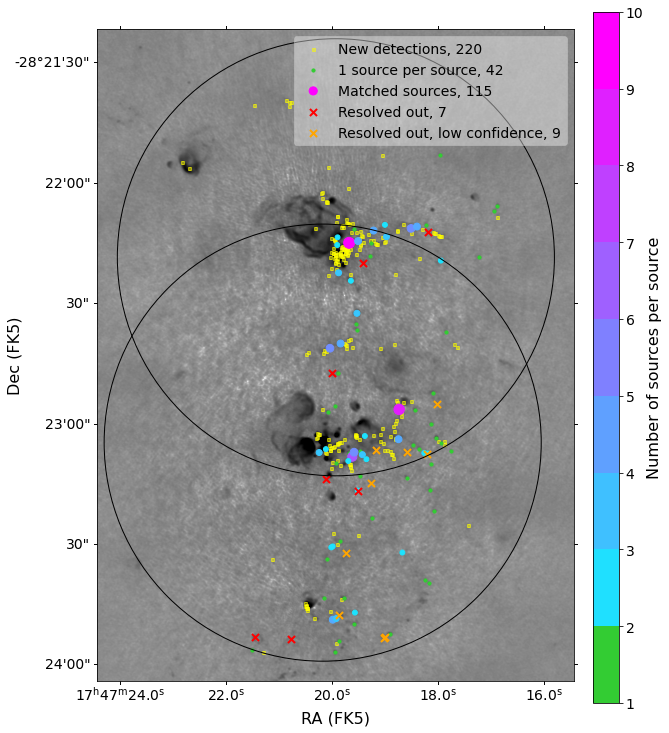

In [41]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(projection=wcs_)
im = ax.imshow(data, cmap='gray_r', norm=norm1,origin='lower')



cmap = plt.cm.cool  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.2, .8, .2, 1.0)
#cmaplist[0] = (0.8039, 0.1961, 0.8039, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(1, 10, 10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


plt.scatter(x_new_coords, y_new_coords, marker = "s",s=9, color = 'yellow', alpha = 0.5, label = 'New detections, '+str(len(x_new_coords)))
#plt.scatter(x_over1, y_over1, s = (sizes*5)**2, label = '2+ sources per source', alpha = 0.5)
sc = plt.scatter(x_1, y_1, color = '#33cc33', s = 10, label = '1 source per source, '+str(len(x_1)))
sc = plt.scatter(x_over1, y_over1, c = sizes, s = sizes*12, cmap = cmap, label = 'Matched sources, '+str(np.sum(occurances_lowres_over1))) # this is supposed to be 109... idk why it isn't
plt.scatter(x_resolved_out, y_resolved_out, marker = 'x', s = 50, color = 'r',label = 'Resolved out, '+str(len(x_resolved_out)))
plt.scatter(x_resolved_out_low_conf, y_resolved_out_low_conf, marker = 'x', s = 50, color = 'orange',label = 'Resolved out, low confidence, '+str(len(x_resolved_out_low_conf)))



#plt.colorbar(sc)
FOVNB3_px.plot(label = 'FOV')
FOVMB3_px.plot()
plt.xlim(1500, 2450)
plt.ylim(1800, 3100)
plt.legend(framealpha = 0.4)

ax2 = fig.add_axes([0.81, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
ax2.set_ylabel('Number of sources per source', size=16)


ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
radesys = wcs_.wcs.radesys
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)

#plt.savefig('/orange/adamginsburg/sgrb2/NB/talk_figs/sources_per_new_detections.png',dpi=300,bbox_inches='tight')
#plt.savefig('sources_per_new_detections.png',dpi=300,bbox_inches='tight')